In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [2]:
from keras.models import Sequential
from keras.layers import Dense

In [3]:
#Cargamos el csv
df = pd.read_csv('lista_tomates.csv')

# ANALISIS EXPLORATORIO DE LOS DATOS

In [4]:
df.head()


,Cultivo,Ubicaciones,Rendimiento,Tamano,Fertilizantes
0,bola,El Ejido,8.01,1,True
1,de pera,Campohermoso,5.96,4,False
2,bola,La Mojonera,8.61,4,False
3,kumato,Nijar,9.85,4,True
4,rosa,El Ejido,9.17,4,False


In [5]:
#Revisamos la información básica del DataFrame, como el número de filas, columnas y tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Cultivo        5000 non-null   object 
 1   Ubicaciones    5000 non-null   object 
 2   Rendimiento    5000 non-null   float64
 3   Tamano         5000 non-null   int64  
 4   Fertilizantes  5000 non-null   bool   
dtypes: bool(1), float64(1), int64(1), object(2)
memory usage: 161.3+ KB


In [6]:
df.describe()

,Rendimiento,Tamano
count,5000.000000,5000.000000
mean,5.008944,2.476800
std,2.895066,1.115218
min,0.000000,1.000000
25%,2.490000,1.000000
50%,5.090000,2.000000
75%,7.510000,3.000000
max,9.990000,4.000000


In [7]:
df.isnull().sum()

Cultivo          0
Ubicaciones      0
Rendimiento      0
Tamano           0
Fertilizantes    0
dtype: int64

In [8]:
print('Cantidad de Filas y columnas:',df.shape)
print('Nombre columnas:',df.columns)

Cantidad de Filas y columnas: (5000, 5)
Nombre columnas: Index(['Cultivo', 'Ubicaciones', 'Rendimiento', 'Tamano', 'Fertilizantes'], dtype='object')


In [9]:
df['Cultivo'].value_counts()

kumato             669
Raf                646
 de pera           638
corazon de buey    637
rosa               603
cherry             603
bola               602
verde              602
Name: Cultivo, dtype: int64

In [10]:
df['Fertilizantes'].value_counts()

False    2510
True     2490
Name: Fertilizantes, dtype: int64

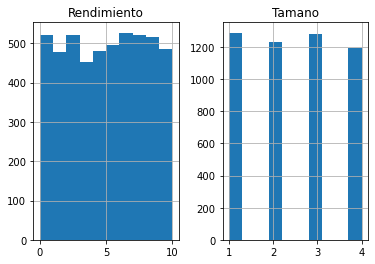

In [11]:
#Visualizamos la distribución de los valores en las columnas numéricas mediante histogramas:
df.hist()
plt.show()

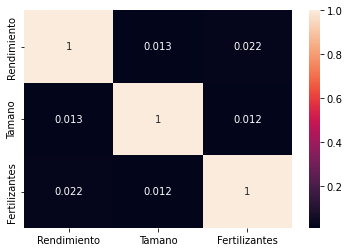

In [12]:
#Calculamos la matriz de correlación entre las variables y visualizarla como un mapa de calor
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [13]:
#De esta manera ya no se tendrán valores no numericos en el array
data_encoded = pd.get_dummies(df, columns=['Cultivo','Ubicaciones','Fertilizantes'])
data_encoded

,Rendimiento,Tamano,Cultivo_ de pera,Cultivo_Raf,Cultivo_bola,Cultivo_cherry,Cultivo_corazon de buey,Cultivo_kumato,Cultivo_rosa,Cultivo_verde,Ubicaciones_Campohermoso,Ubicaciones_El Alquian,Ubicaciones_El Ejido,Ubicaciones_La Mojonera,Ubicaciones_Nijar,Fertilizantes_False,Fertilizantes_True
0,8.01,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,5.96,4,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,8.61,4,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
3,9.85,4,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
4,9.17,4,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4.57,2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4996,5.82,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
4997,9.71,4,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
4998,1.69,2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [14]:
# Dividir los datos en características (X) y variable objetivo (y)
X = data_encoded.drop('Rendimiento', axis=1)
y = data_encoded['Rendimiento']

In [15]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Crear el modelo de árbol de decisión de regresión
model = DecisionTreeRegressor()

In [17]:
# Entrenar el modelo
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [18]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [19]:
# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 8.662067048522626


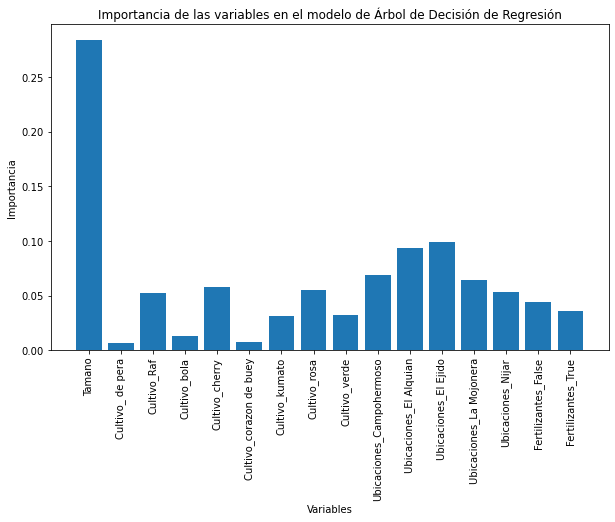

In [20]:
# Obtener las características más importantes del modelo
importance = model.feature_importances_

# Crear un gráfico de barras para mostrar la importancia de las variables
plt.figure(figsize=(10, 6))
plt.bar(X.columns, importance)
plt.xticks(rotation=90)
plt.xlabel('Variables')
plt.ylabel('Importancia')
plt.title('Importancia de las variables en el modelo de Árbol de Decisión de Regresión')
plt.show()

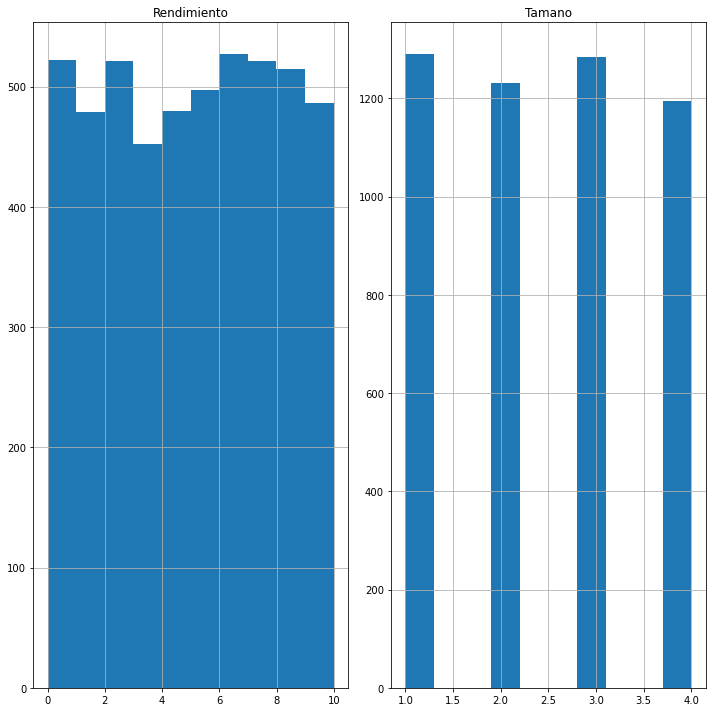

In [21]:
# Explorar los datos y visualizar las variables
# Por ejemplo, aquí se muestra un histograma para cada variable
df.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

In [22]:
# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))


In [23]:
# Compilar el modelo
model.compile(loss='mean_squared_error', optimizer='adam')
# Entrenar el modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)


Epoch 1/100
125/125 [==============================] - 0s 2ms/step - loss: 12.9354 - val_loss: 8.5230
Epoch 2/100
125/125 [==============================] - 0s 912us/step - loss: 8.4656 - val_loss: 8.3998
Epoch 3/100
125/125 [==============================] - 0s 1ms/step - loss: 8.3858 - val_loss: 8.4171
Epoch 4/100
125/125 [==============================] - 0s 905us/step - loss: 8.3761 - val_loss: 8.4215
Epoch 5/100
125/125 [==============================] - 0s 940us/step - loss: 8.3522 - val_loss: 8.4056
Epoch 6/100
125/125 [==============================] - 0s 929us/step - loss: 8.3155 - val_loss: 8.3677
Epoch 7/100
125/125 [==============================] - 0s 960us/step - loss: 8.3301 - val_loss: 8.6206
Epoch 8/100
125/125 [==============================] - 0s 1ms/step - loss: 8.3056 - val_loss: 8.4236
Epoch 9/100
125/125 [==============================] - 0s 1ms/step - loss: 8.3145 - val_loss: 8.4156
Epoch 10/100
125/125 [==============================] - 0s 905us/step - loss: 8.

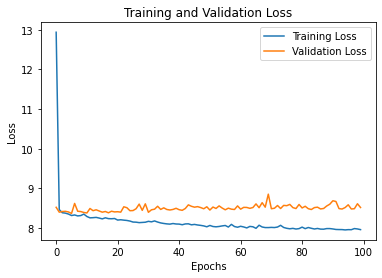

In [24]:
# Visualizar la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()